In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re

Using TensorFlow backend.


In [3]:
from statistics import mean,mode

In [4]:
fakenews = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
realnews=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [5]:
fakenews.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fakenews.shape

(23481, 4)

In [7]:
realnews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
realnews.shape

(21417, 4)

In [9]:
fakenews['category']='Fake'
realnews['category']="True"

In [10]:
fakenews.head()


,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [11]:
fakenews.describe()

,title,text,subject,date,category
count,23481,23481,23481,23481,23481
unique,17903,17455,6,1681,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017",Fake
freq,6,626,9050,46,23481


In [12]:
realnews.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [13]:
realnews.describe()

,title,text,subject,date,category
count,21417,21417,21417,21417,21417
unique,20826,21192,2,716,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017",True
freq,14,8,11272,182,21417


In [14]:
#Combining both the datasets
news=pd.concat([realnews,fakenews])

In [15]:
news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [16]:
news.describe()

,title,text,subject,date,category
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [17]:
#Shuffling the dataset
news = news.sample(frac=1).reset_index(drop=True)


In [18]:
news.head()

,title,text,subject,date,category
0,Tokyo Governor Koike: will examine steps to ex...,TOKYO (Reuters) - Popular Tokyo Governor Yurik...,worldnews,"September 28, 2017",True
1,Exclusive: Cruz about even with Trump in Repub...,NEW YORK (Reuters) - U.S. presidential candida...,politicsNews,"April 5, 2016",True
2,Catalan government says 90 percent voted to le...,MADRID (Reuters) - The Catalan government said...,worldnews,"October 1, 2017",True
3,Trump Loses His Sh*t Over SNL Skit And Alec B...,"Once again, Donald Trump threw a temper tantru...",News,"November 20, 2016",Fake
4,Burundi loses bid to stop U.N. atrocities inve...,GENEVA (Reuters) - The U.N. Human Rights Counc...,worldnews,"September 29, 2017",True


In [19]:
news['title'][0]

'Tokyo Governor Koike: will examine steps to exit nuclear power dependence by 2030'

In [20]:
#Counting the words in the title columns' cell
news['title'].str.count(' ') + 1

0        13
1        12
2         9
3        14
4         8
         ..
44893    15
44894     9
44895     8
44896    11
44897    15
Name: title, Length: 44898, dtype: int64

In [21]:
#Counting the words in the text columns' cell

news['text'].str.count(' ') + 1

0        135
1        343
2         50
3        416
4        397
        ... 
44893    521
44894    585
44895    421
44896     83
44897    490
Name: text, Length: 44898, dtype: int64

In [22]:
news.subject.unique()

array(['worldnews', 'politicsNews', 'News', 'politics', 'US_News',
       'Middle-east', 'left-news', 'Government News'], dtype=object)

In [23]:
news['text'][0]

'TOKYO (Reuters) - Popular Tokyo Governor Yuriko Koike, whose fledgling party is gaining momentum ahead of an Oct. 22 general election, said on Thursday at a news conference that she would look into what steps are needed to reduce Japan s dependence on nuclear energy to zero by 2030. Prime Minister Shinzo Abe is calling the snap poll in the hope his Liberal Democratic Party-led coalition can keep its majority in the parliament s lower house, where it now holds two-thirds of the seats. Koike has said she wants Japan to abandon nuclear power - a stance likely to resonate with many voters - but had not previously mentioned a target date. Abe s government plans to retain atomic power as part of the energy mix, despite safety worries after the 2011 Fukushima crisis. '

In [24]:
news['title'][0]

'Tokyo Governor Koike: will examine steps to exit nuclear power dependence by 2030'

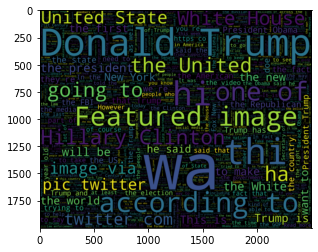

In [25]:
from wordcloud import WordCloud , STOPWORDS
wc = WordCloud(max_words = 2000 , width=2500,height=2000,stopwords=STOPWORDS).generate("".join(news[news.category=='Fake'].text))
plt.imshow(wc , interpolation = 'bilinear')

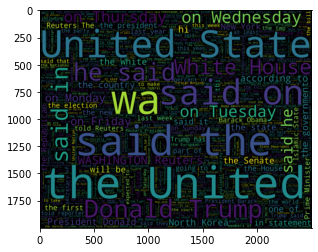

In [26]:
from wordcloud import WordCloud , STOPWORDS
wc = WordCloud(max_words = 2000 , width=2500,height=2000,stopwords=STOPWORDS).generate("".join(news[news.category=='True'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [27]:
news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [28]:
news['text']=news['text']+news['title']

In [29]:
news.head()

,title,text,subject,date,category
0,Tokyo Governor Koike: will examine steps to ex...,TOKYO (Reuters) - Popular Tokyo Governor Yurik...,worldnews,"September 28, 2017",True
1,Exclusive: Cruz about even with Trump in Repub...,NEW YORK (Reuters) - U.S. presidential candida...,politicsNews,"April 5, 2016",True
2,Catalan government says 90 percent voted to le...,MADRID (Reuters) - The Catalan government said...,worldnews,"October 1, 2017",True
3,Trump Loses His Sh*t Over SNL Skit And Alec B...,"Once again, Donald Trump threw a temper tantru...",News,"November 20, 2016",Fake
4,Burundi loses bid to stop U.N. atrocities inve...,GENEVA (Reuters) - The U.N. Human Rights Counc...,worldnews,"September 29, 2017",True


In [30]:
news=news.drop(columns=['title','date'])

In [31]:
news.head()

,text,subject,category
0,TOKYO (Reuters) - Popular Tokyo Governor Yurik...,worldnews,True
1,NEW YORK (Reuters) - U.S. presidential candida...,politicsNews,True
2,MADRID (Reuters) - The Catalan government said...,worldnews,True
3,"Once again, Donald Trump threw a temper tantru...",News,Fake
4,GENEVA (Reuters) - The U.N. Human Rights Counc...,worldnews,True


In [32]:
# news=pd.get_dummies(news['subject'])

In [33]:
news.head()

,text,subject,category
0,TOKYO (Reuters) - Popular Tokyo Governor Yurik...,worldnews,True
1,NEW YORK (Reuters) - U.S. presidential candida...,politicsNews,True
2,MADRID (Reuters) - The Catalan government said...,worldnews,True
3,"Once again, Donald Trump threw a temper tantru...",News,Fake
4,GENEVA (Reuters) - The U.N. Human Rights Counc...,worldnews,True


In [34]:
from nltk.corpus import stopwords

In [35]:
stopwords=set(stopwords.words('english'))

In [36]:
# def strip_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()
#Removing the square brackets
# def remove_between_square_brackets(text):
#     return re.sub('\[[^]]*\]', '', text)
# # Removing URL's
# def remove_between_square_brackets(text):
#     return re.sub(r'http\S+', '', text)
# #Removing the stopwords from text
# def remove_stopwords(text):
#     final_text = []
#     for i in text.split():
#         if i.strip().lower() not in stop:
#             final_text.append(i.strip())
#     return " ".join(final_text)
# #Removing the noisy text
# def denoise_text(text):
# #     text = strip_html(text)
#     text = remove_between_square_brackets(text)
#     text = remove_stopwords(text)
#     return text
# #Apply function on review column
import string
from nltk.stem import WordNetLemmatizer 
  
lm = WordNetLemmatizer() 
def clean_text(words):
    
    words=re.sub('[^a-zA-Z]',' ',words)
    words=words.lower()
    words=words.split()
    words=[lm.lemmatize(word) for word in words]
    words=' '.join(words)
    return words
    
news['text']=news['text'].apply(clean_text)

In [37]:
len(news['text'][0])

803

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(news['text']).toarray()

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_sentences=news['text'][:35000]
test_sentences=news['text'][35000:]
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)

sequences=tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,padding='post',maxlen=2500,truncating='post')

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padding=pad_sequences(test_sequences,padding='post',maxlen=2500,truncating='post')


In [40]:
print(padded[0])

[3046   74  978 ...    0    0    0]


In [41]:
X=pd.DataFrame(padded)

In [42]:
X['subject']=news['subject']

In [43]:
y=news['category']

In [44]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,subject
0,3046,74,978,3046,377,1,6031,696,1,90,...,0,0,0,0,0,0,0,0,0,worldnews
1,62,254,74,27,8,165,194,898,403,8,...,0,0,0,0,0,0,0,0,0,politicsNews
2,2470,74,2,1651,71,16,282,144,45,44,...,0,0,0,0,0,0,0,0,0,worldnews
3,487,326,75,14,2915,4,4679,4048,69,571,...,0,0,0,0,0,0,0,0,0,News
4,2612,74,2,27,325,459,88,586,837,10,...,0,0,0,0,0,0,0,0,0,worldnews


In [45]:
X=pd.get_dummies(X,drop_first=True)

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2497,2498,2499,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,3046,74,978,3046,377,1,6031,696,1,90,...,0,0,0,0,0,0,0,0,0,1
1,62,254,74,27,8,165,194,898,403,8,...,0,0,0,0,0,0,0,0,1,0
2,2470,74,2,1651,71,16,282,144,45,44,...,0,0,0,0,0,0,0,0,0,1
3,487,326,75,14,2915,4,4679,4048,69,571,...,0,0,0,0,1,0,0,0,0,0
4,2612,74,2,27,325,459,88,586,837,10,...,0,0,0,0,0,0,0,0,0,1


In [47]:
X.shape

(35000, 2507)

In [48]:
y_train=y[:35000]
y_test=y[35000:]

In [49]:
y_train=pd.get_dummies(y_train,drop_first=True)
y_test=pd.get_dummies(y_test,drop_first=True)

In [50]:
X_test=pd.DataFrame(test_padding)
X_test['subject']=news['subject'][:35000]

In [51]:
X_test=pd.get_dummies(X_test,drop_first=True)

In [52]:
X_test.shape

(9898, 2507)

In [ ]:
y_test=np.array(y_test)

In [64]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2497,2498,2499,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
0,3046,74,978,3046,377,1,6031,696,1,90,...,0,0,0,0,0,0,0,0,0,1
1,62,254,74,27,8,165,194,898,403,8,...,0,0,0,0,0,0,0,0,1,0
2,2470,74,2,1651,71,16,282,144,45,44,...,0,0,0,0,0,0,0,0,0,1
3,487,326,75,14,2915,4,4679,4048,69,571,...,0,0,0,0,1,0,0,0,0,0
4,2612,74,2,27,325,459,88,586,837,10,...,0,0,0,0,0,0,0,0,0,1


In [67]:
X.columns

Index([                     0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,
       ...
                         2497,                   2498,                   2499,
        'subject_Middle-east',         'subject_News',      'subject_US_News',
          'subject_left-news',     'subject_politics', 'subject_politicsNews',
          'subject_worldnews'],
      dtype='object', length=2507)

In [68]:
X1 = X.drop(columns = ['subject_Middle-east',         'subject_News',      'subject_US_News',
          'subject_left-news',     'subject_politics', 'subject_politicsNews',
          'subject_worldnews'])

In [69]:
X1.shape

(35000, 2500)

In [70]:
X1.columns

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499],
      dtype='object', length=2500)

In [72]:
X_test2 = X_test.drop(columns = ['subject_Middle-east',         'subject_News',      'subject_US_News',
          'subject_left-news',     'subject_politics', 'subject_politicsNews',
          'subject_worldnews'])
# y_pred2 = model.predict(X_test2)

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Embedding

model=Sequential()
model.add(Embedding(10000, 64, input_length=2500))
model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X1,y_train,epochs=10,validation_data=(X_test2,y_test))

y_pred = model.predict(X_test2)

# y_test1 = (y_pred>0.7)


/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 35000 samples, validate on 9898 samples
Epoch 1/10
35000/35000 [==============================] - 33s 933us/step - loss: 0.3230 - accuracy: 0.7796 - val_loss: 0.0055 - val_accuracy: 0.9979
Epoch 2/10
35000/35000 [==============================] - 30s 859us/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 3/10
35000/35000 [==============================] - 32s 904us/step - loss: 4.1385e-04 - accuracy: 0.9999 - val_loss: 0.0031 - val_accuracy: 0.9989
Epoch 4/10
35000/35000 [==============================] - 30s 871us/step - loss: 1.6639e-04 - accuracy: 0.9999 - val_loss: 0.0028 - val_accuracy: 0.9989
Epoch 5/10
35000/35000 [==============================] - 31s 888us/step - loss: 8.3795e-06 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 6/10
35000/35000 [==============================] - 30s 857us/step - loss: 4.4916e-06 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 7/10
35000/35000 [=================

In [ ]:
# y_pred2 = model.predict(X_test2)

> # Making a composite model

In [75]:
X_final = X[['subject_Middle-east',         'subject_News',      'subject_US_News',
          'subject_left-news',     'subject_politics', 'subject_politicsNews',
          'subject_worldnews']]
X_final['prob'] = model.predict(X1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [83]:
X_final.head()

,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews,prob
0,0,0,0,0,0,0,1,1.000000e+00
1,0,0,0,0,0,1,0,1.000000e+00
2,0,0,0,0,0,0,1,1.000000e+00
3,0,1,0,0,0,0,0,2.568257e-12
4,0,0,0,0,0,0,1,1.000000e+00


In [84]:
X_test.columns

Index([                     0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,
       ...
                         2497,                   2498,                   2499,
        'subject_Middle-east',         'subject_News',      'subject_US_News',
          'subject_left-news',     'subject_politics', 'subject_politicsNews',
          'subject_worldnews'],
      dtype='object', length=2507)

In [88]:
X_test3 = X_test[['subject_Middle-east',         'subject_News',      'subject_US_News',
          'subject_left-news',     'subject_politics', 'subject_politicsNews',
          'subject_worldnews']]
X_test3['prob'] = y_pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [89]:
import xgboost
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_final,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [90]:
y_clf = clf.predict(X_test3)

In [92]:
y_clf

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [93]:
print(confusion_matrix(y_clf, y_test))

[[5159    6]
 [   3 4730]]


In [ ]:
print(y_test)

In [ ]:
print(y_pred)

In [ ]:
print(y_test1)

In [94]:
print("accuracy: {}%".format(round(accuracy_score(y_clf, y_test)*100,2)))

accuracy: 99.91%


In [ ]:
print(confusion_matrix(y_test, y_test1))

In [95]:
print(classification_report(y_clf, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5165
           1       1.00      1.00      1.00      4733

    accuracy                           1.00      9898
   macro avg       1.00      1.00      1.00      9898
weighted avg       1.00      1.00      1.00      9898



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(news['text'],news.category, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(confusion_matrix(y_test, prediction))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(confusion_matrix(y_test, prediction))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
print(classification_report(y_test, prediction))